In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix
from cnmf_e import update_ring_model_w, update_temporal, update_spatial

In [2]:
# data = np.load("cnmfe_update_ring_output.npz")
# print(data.files)

In [3]:
# U = data['U']
# V = data['V']
# A = data['A']
# X = data['X']
# W = data['W'] # can NOT load W since W is sparse matrix
# d1 = data['d1']
# d2 = data['d2']
# T = data['T']
# b0 = data['b0']

In [4]:
data = np.load("cnmfe_init_output.npz")
# print(data.files)
d1, d2, T, r = data['arr_4']
# print(d1, d2, r, T)
U = data['arr_0']
V = data['arr_1']
A = data['arr_2']
X = data['arr_3']

In [5]:
print(U.shape, V.shape, A.shape, X.shape)
b0, W = update_ring_model_w(U, V, A, X, [], d1, d2, T, r)
print(b0.shape, W.shape)

(76608, 50) (50, 2000) (76608, 200) (200, 50)
(76608,) (76608, 76608)


In [6]:
C0 = np.matmul(X, V)

In [7]:
C0.shape

(200, 2000)

In [8]:
b0_T = update_temporal(U, V, A, X, W, d1, d2, T, iter=5)

In [9]:
C1 = np.matmul(X, V)

In [10]:
C1.shape

(200, 2000)

In [11]:
k, _ = C1.shape
corr = []
for j in range(k):
    c01 = np.inner(C0[j, :], C1[j, :]) / np.linalg.norm(C0[j, :]) / np.linalg.norm(C1[j, :])
    corr.append(c01)

(array([  1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0., 198.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 <a list of 10 Patch objects>)

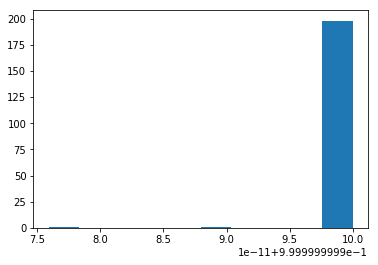

In [12]:
plt.hist(corr)

In [20]:
corr

[1.0,
 0.9999999999999997,
 0.9999999999999998,
 1.0,
 1.0000000000000002,
 0.9999999999999997,
 1.0,
 1.0000000000000002,
 0.9999999999999997,
 1.0,
 1.0,
 1.0,
 1.0000000000000002,
 1.0,
 1.0,
 1.0,
 1.0000000000000002,
 1.0,
 1.0,
 1.0,
 0.9999999999999983,
 1.0000000000000002,
 0.999999999999999,
 1.0,
 1.0,
 1.0000000000000002,
 0.9999999999999998,
 0.9999999999999999,
 0.9999999999999993,
 1.0,
 0.9999999999999997,
 1.0,
 0.9999999999999998,
 0.9999999999999996,
 0.9999999999999998,
 0.9999999999999999,
 1.0000000000000002,
 1.0000000000000002,
 0.9999999999999998,
 0.9999999999999998,
 1.0000000000000004,
 1.0,
 0.9999999999999992,
 0.999999999999998,
 1.0,
 0.9999999999999998,
 1.0,
 0.9999999999999044,
 0.9999999999999999,
 1.0,
 1.0000000000000002,
 0.9999999999999999,
 0.9999999999891632,
 1.0,
 0.9999999999999998,
 0.9999999999999996,
 1.0,
 1.0,
 1.0,
 1.0000000000000002,
 1.0,
 1.0,
 0.9999999999999998,
 1.0000000000000002,
 1.0,
 0.9999999999999998,
 0.9999999999999998,


In [13]:
A0 = copy.deepcopy(A)

In [14]:
b0_S = update_spatial(U, V, A, X, W, d1, d2, T, iter=5)

In [15]:
A1 = A

In [16]:
A1.shape

(76608, 200)

In [17]:
_, k = A.shape
corr_A = []
for j in range(k):
    a01 = np.inner(A0[:, j], A1[:, j]) / np.linalg.norm(A0[:, j]) / np.linalg.norm(A1[:, j])
    corr_A.append(a01)

(array([ 1.,  6.,  3., 40., 30.,  0., 66.,  0., 49.,  5.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 <a list of 10 Patch objects>)

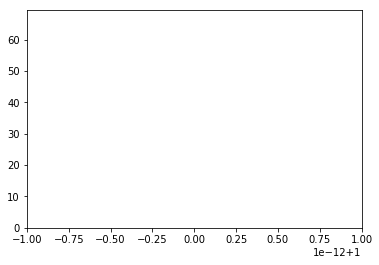

In [18]:
plt.hist(corr_A)

In [19]:
corr_A

[1.0,
 1.0,
 0.9999999999999999,
 0.9999999999999998,
 0.9999999999999998,
 1.0,
 1.0,
 0.9999999999999999,
 1.0000000000000002,
 0.9999999999999998,
 0.9999999999999998,
 0.9999999999999998,
 1.0,
 0.9999999999999998,
 1.0,
 0.9999999999999999,
 0.9999999999999998,
 1.0,
 0.9999999999999998,
 0.9999999999999998,
 1.0,
 0.9999999999999994,
 0.9999999999999996,
 1.0,
 1.0,
 0.9999999999999998,
 0.9999999999999998,
 1.0000000000000002,
 1.0000000000000002,
 1.0,
 1.0,
 0.9999999999999998,
 0.9999999999999999,
 1.0000000000000002,
 1.0000000000000004,
 1.0,
 1.0,
 1.0000000000000002,
 0.9999999999999998,
 0.9999999999999998,
 1.0,
 0.9999999999999999,
 1.0000000000000002,
 0.9999999999999998,
 0.9999999999999999,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 0.9999999999999999,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 0.9999999999999997,
 1.0,
 1.0000000000000002,
 1.0,
 1.0,
 1.0000000

In [33]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('/home/jian/Downloads/messi5.jpg')

In [39]:
img = np.zeros((10,10))

In [45]:
img[:, 5] = 1

In [46]:
img

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [47]:
kernel = np.ones((3, 3), np.uint8)

In [48]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [49]:
img_dilated = cv2.dilate(img, kernel=kernel, iterations=1)

In [50]:
img_dilated

array([[0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0., 0., 0.]])